In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load Data
data = pd.read_csv("adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
# Tree Node
class Node():
    def __init__(self, idx = None, threshold = None, left = None, right = None, gain = None, val = None):
        self.idx = idx
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.val = val

In [4]:
# C4.5 algorithm as class
class C45():
    def __init__(self, theta = 0, root = None, max_depth = 10, min_split = 2):
        self.theta = theta
        self.root = root
        self.max_depth = max_depth
        self.min_split = min_split
        
    def tree(self, data, depth = 0):
        input
        x = data[:,:-1]
        y = data[:,-1]
        samples_length, feature_length = np.shape(x)
        if(samples_length >= self.min_split and depth <= self.max_depth):
            max_gain = -9999999
            splits = {}
            for i in range(feature_length):
                values = data[:, i]
                thresholds = np.unique(values)
                for thresh in thresholds:
                    left_data = np.array([row for row in data if row[i] <= thresh])
                    right_data = np.array([row for row in data if row[i] > thresh])
                    if(len(left_data) > 0 and len(right_data) > 0):
                        y = data[:,-1]
                        left_y = left_data[:,-1]
                        right_y = right_data[:,-1]
                        gain = self.entropy(y)-((len(left_y)/len(y))*self.entropy(left_y)+(len(right_y)/len(y))*self.entropy(right_y))
                        if(gain > max_gain):
                            splits["feature_index"] = i
                            splits["threshold"] = thresh
                            splits["dataset_left"] = left_data
                            splits["dataset_right"] = right_data
                            splits["info_gain"] = gain
                            max_gain = gain
            if(splits["info_gain"] > self.theta):
                subtree_r = self.tree(splits["dataset_right"], depth + 1)
                subtree_l = self.tree(splits["dataset_left"], depth + 1)
                return Node(splits["feature_index"], splits["threshold"],subtree_l, subtree_r, splits["info_gain"])
        return Node(val = max(list(y), key = list(y).count))
    
    def entropy(self, y):
        entropy = 0
        for cls in np.unique(y):
            p = len(y[y == cls])/len(y)
            entropy += -p*np.log2(p)
        return entropy
    
    def predictions_rec(self, x, tree):
        if(tree.val != None): 
            return tree.val
        else:
            feature_val = x[tree.idx]
        
        if(feature_val <= tree.threshold):
            return self.predictions_rec(x, tree.left)
        else:
            return self.predictions_rec(x, tree.right)
    
    def pred(self, x):
        predictions = []
        for i in x:
            predictions.append(self.predictions_rec(i, self.root))
        return predictions
    
    def fit(self, x, y):
        self.root = self.tree(np.concatenate((x, y), axis=1))


In [5]:
# Splitting training, test, validation
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values.reshape(-1,1)
x_train, x_testval, y_train, y_testval = train_test_split(x, y, test_size=.3)
x_test, x_val, y_test, y_val = train_test_split(x_testval, y_testval, test_size=.33)

In [6]:
# User chooses split and theta
user_choice = int(input("What is the minimum split: "))
theta = float(input("Input a theta: "))
classifier = C45(theta = theta, min_split = user_choice, max_depth = 3)
classifier.fit(x_train,y_train)

0


0
1
1
2
3
4
4
3
4
4
2
0
1
1
2
3
4
4
3
4
4
2
0
0
0


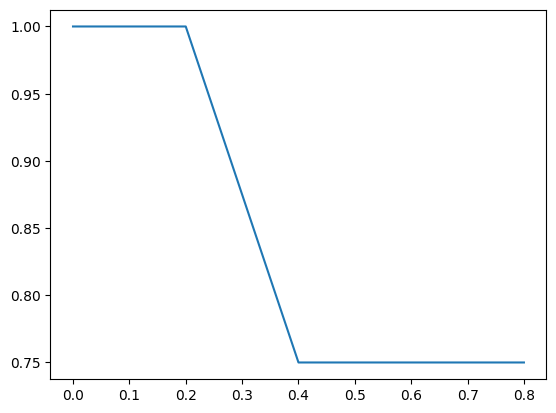

In [7]:
# Plotting scores for different thetas
scores = []
for theta in [0,.2,.4,.6,.8]:
    classifier = C45(theta = theta, min_split = 3, max_depth = 3)
    classifier.fit(x_train,y_train)
    y_pred = classifier.pred(x_test) 
    scores.append(accuracy_score(y_test, y_pred))
plt.plot([0,.2,.4,.6,.8],scores)